# Topic 6 - Are there fragile regions in the human genome?

## Combinatorial Algorithms - Chapter 6
Motivation and some exercises are variations on those available in Bioinformatics Algorithms: An Active-Learning Approach by Phillip Compeau & Pavel Pevzner.

*Ice breaker:*

What is the best candy bar?

## Rearrangements in Tumor Genomes
### A win that shows why many of us work in bioinformatics...
<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/Philadelphia_chromosome.png" width=400>

> The figure above presents a rearrangement involving human chromosomes 9 and 22 in a rare form of cancer called chronic myeloid leukemia (CML). 
> Once scientists understood the root cause of CML, they started searching for a compound inhibiting ABL-BCR, which resulted in the introduction of a drug called Gleevec in 2001.

# Of Mice and Men
* Nearly every human gene has a mouse counterpart
* We even have genes that make tails, but those are silenced

So the question is:
> What evolutionary forces have transformed the genome of the human-mouse ancestor into the present-day human and mouse genomes?



## Genome rearrangement
* You can cut the 23 human chromosomes into 280 pieces, shuffle these DNA fragments and then glue the pieces together in a new order to form the 20 mouse chromosomes
* In this chapter and lab we will work to understand the genome rearrangements that have separated the human and mouse genomes

## Quick word about the X chromosome
* One of two sex-determining chromosomes in mammals
* It's retained nearly all its genes throughout mammalian evolution
* We can view it as a mini-genome because this chromosome's genes have not jumped onto different chromosomes

## Synteny blocks
* Genes across species often appear in procession
* This is known as a synteny block
* Constructing these blocks simplifies our problem from 150 million base pairs on the X chromosome to only eleven units

<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/mouse_and_human_synteny_blocks.png">
Color and shape indicate a block. Direction indicated by arrow head. Note that some blocks are longer than others.

## Reversal Genome Rearrangment
* Flips around an interval of a chromosome and inverts the directions of any synteny blocks within that interval
* Genome rearrangements typically cause the death or sterility of the mutated organism
* So they are pretty rare
* A tiny fraction may have a positive effect on survival and propagate

**Stop and think:** Can you go from mouse to human in 7 moves?

<img src="https://docs.google.com/drawings/d/e/2PACX-1vTipOfR48sRPj13b4H9BSHq2RNdVOc320leFCSv0igxByC1SI4uncM0YnJI7bJAeHJou26lw5iXORam/pub?w=1245&h=498">

How do we go from human to mouse (and is this the only way we can do so with 7 changes)? 
<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/transforming_mouse_into_human_7_reversals.png">

## Random Breakage Model
* 1973, Susumu Ohno proposed the Random Breakage Model of chromosome evolution
* Hypothesizes that the breakage points of rearrangements are selected randomly
* Implies that rearrangement hotspots in mammalian genomes do not exist
* Yet Ohno's model lacked supporting evidence when it was introduced

## Replicating a computational experiment

* In 1984, Joseph Nadeau and Benjamin Taylor asked what the expected lengths of synteny blocks should be after N reversals occurring at random locations in the genome.
* Rule out the unlikely event that two random reversals cut the chromosome in exactly the same position
* Assuming this, N random reversals cut the chromosome in 2N locations and produce 2N + 1 synteny blocks
* We will simulate this with 25,000 genes and 320 random reversals resulting in 2*320+1=641 synteny blocks

**Exercise 1**: Simulating reversals

Using the method descried above, I want you to write a simulation that cuts the chromosome into blocks. You should end up with 2N+1 blocks (N=320 below). The autograder is going to look at the distribution of the lengths of your blocks. This is a stochastic simulation, so the autograder has run this simulation many times, and it is aware of reasonable levels of variation. 

In [1]:
import pandas as pd
ngenes = 25000
chromosome = ["g%d"%i for i in range(ngenes)]
pd.Series(chromosome)

0            g0
1            g1
2            g2
3            g3
4            g4
          ...  
24995    g24995
24996    g24996
24997    g24997
24998    g24998
24999    g24999
Length: 25000, dtype: object

<AxesSubplot:ylabel='Frequency'>

array([340, 157,  61,  40,  19,  15,   4,   1,   2,   1])

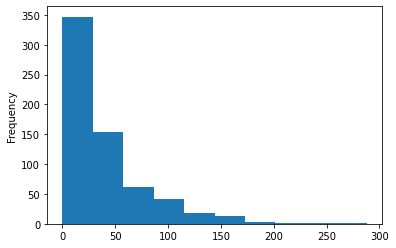

In [6]:
%matplotlib inline 
import random
import numpy as np
random.seed(0)
random_reversals = 320
bins = [0. ,  27.8,  55.6,  83.4, 111.2, 139. , 166.8, 194.6, 222.4, 250.2, 278.] # for plotting only

lens = [] # FILL THIS OUT WITH THE LENGTHS OF YOUR BLOCKS
# YOUR SOLUTION HERE
display(pd.Series(lens).plot.hist());
counts,centers = np.histogram(lens,bins=bins)
counts

## Why simulate and a greedy heuristic?
I find it very useful to simulate my own data if for no other reason than to enhance my understanding. Since you've done a simulation, consider this:

> If I gave you the blocks you arrived at in the end, can you tell me how we arrived at them?

Consider the greedy heuristic next...

**Exercise 2**: Greedy heuristic for sorting by reversals

For this exercise, I want you to implement the greedy heuristic as described in Chapter 6. 

Input: $P$ - signed permutation (pandas Series object)

Output: $d_{rev}(P)$ - number of reversals

In [13]:
def greedy_sorting(P):
    P = P.copy()
    approx_rev_distance = 0
    # YOUR SOLUTION HERE
    return approx_rev_distance
            
P_list = [1,-7,6,-10,9,-8,2,-11,-3,5,4]
P = pd.Series(P_list,index=list(range(1,len(P_list)+1)))

print("Target:")
print("\t".join(P.index.astype(str)))
print("Solution trace:")
approx_rev_distance = greedy_sorting(P)
print("Approximate reversal distance:",approx_rev_distance)

Target:
1	2	3	4	5	6	7	8	9	10	11
Solution trace:
1	-7	6	-10	9	-8	2	-11	-3	5	4
1	-2	8	-9	10	-6	7	-11	-3	5	4
1	2	8	-9	10	-6	7	-11	-3	5	4
1	2	3	11	-7	6	-10	9	-8	5	4
1	2	3	-4	-5	8	-9	10	-6	7	-11
1	2	3	4	-5	8	-9	10	-6	7	-11
1	2	3	4	5	8	-9	10	-6	7	-11
1	2	3	4	5	6	-10	9	-8	7	-11
1	2	3	4	5	6	-7	8	-9	10	-11
1	2	3	4	5	6	7	8	-9	10	-11
1	2	3	4	5	6	7	8	-9	10	-11
1	2	3	4	5	6	7	8	9	10	-11
1	2	3	4	5	6	7	8	9	10	-11
1	2	3	4	5	6	7	8	9	10	11
Approximate reversal distance: 11


## Definition of Breakpoints
Put simply breakpoints are located in between adjacent blocks that do not differ by 1.

* Breakpoint exists between (5,7)
* Breakpoint does not exist between (5,6)
* Breakpoint does not exist between (-7,-6)

**Stop and think:** How many breakpoints are there in 3,4,5,-12,-8,-7,-6,1,2,10,9,-11,13,14?

**Exercise 3**: Number of breakpoints problem

For this exercise, I want you to find the number of breakpoints in a permutation. 

Input: $P$ - signed permutation (pandas Series object)

Output: Number of breakpoints in this permutation

In [14]:
def count_breakpoints(P):
    nbreakpoints = 0
    # YOUR SOLUTION HERE
    return nbreakpoints

P_list2 = [3,4,5,-12,-8,-7,-6,1,2,10,9,-11,13,14]
P2 = pd.Series(P_list2,index=list(range(1,len(P_list2)+1)))
nbreakpoints_P2 = count_breakpoints(P2)
P_list3 = [3,4,5,-12,-8,-7,-6,1,2,10,9,-11,14,13]
P3 = pd.Series(P_list3,index=list(range(1,len(P_list2)+1)))
nbreakpoints_P3 = count_breakpoints(P3)
nbreakpoints_P2,nbreakpoints_P3

(8, 10)

## From Unichromosomal to Multichromosomal Genomes
Four types of rearrangements
 * reversals
 * translocations - exchanges segments of different chromosomes
 * fusions - fuse two chromosomes
 * fissions - split a chromosome into two

**Translocation example**

In [6]:
chromosome1 = [1,2,3,4,5,6]; chromosome2 = [7,8,9,10,11]
cut1 = 4; cut2 = 2 # inclusive indices of the cuts
chromosome1a = chromosome1[:cut1]
chromosome1b = chromosome1[cut1:]
chromosome2a = chromosome2[:cut2]
chromosome2b = chromosome2[cut2:]
new_chromosome1 = chromosome1a + chromosome2b
new_chromosome2 = chromosome2a + chromosome1b
print(tuple(chromosome1a),tuple(chromosome1b));print(tuple(chromosome2a),tuple(chromosome2b));print(tuple(new_chromosome1),tuple(new_chromosome2))

(1, 2, 3, 4) (5, 6)
(7, 8) (9, 10, 11)
(1, 2, 3, 4, 9, 10, 11) (7, 8, 5, 6)


You guessed it... Now it is time for more graphs
<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/genome_graph.png" width=400>

> Figure: A genome with two circular chromosomes, (+a −b −c +d) and (+e +f +g +h +i +j). Black directed edges represent synteny blocks, and red undirected edges connect adjacent synteny blocks. A circular chromosome with n﻿ elements can be written in 2n different ways; the chromosome on the left can be written as (+a −b −c +d), (−b −c +d +a), (−c +d +a −b), (+d +a −b −c), (−a −d +c +b) (−d +c +b −a), (+c +b −a −d), and (+b −a −d +c).

**Exercise 4**: Representing a graph

For this exercise, I want you to adopt a specific format for representing the genome graphs. We can't easily construct the arrow, but we can come up with a straightforward way to represent it.

Input: genome - a list of signed permutation (pandas Series objects)

Output: A networkx graph

In [18]:
import networkx as nx
import copy

def to_adj(T):
    df = pd.DataFrame(nx.adjacency_matrix(T).todense(),index=T.nodes(),columns=T.nodes())
    return df

def to_edge_list(T):
    return list(T.edges())

def show(G,G2=None,P_G=None):
        pos = nx.circular_layout(G)
                
        nx.draw_networkx_nodes(G, pos=pos,node_size=600,node_color='w')
        nx.draw_networkx_labels(G, pos=pos)        
        nodes = list(G.nodes())
        edge_list_grey = []
        edge_list_red = []
        edge_list_blue = []
        edge_list_purple = []
        for i in range(len(nodes)):
            n1 = nodes[i]
            for j in range(i+1,len(nodes)):
                n2 = nodes[j]
                if n1 == -n2:
                    edge_list_grey.append((n1,n2))
                elif G2 is not None:
                    if G.has_edge(n1,n2) and G2.has_edge(n1,n2):
                        edge_list_purple.append((n1,n2))
                    elif G.has_edge(n1,n2):
                        edge_list_red.append((n1,n2))
                    elif G2.has_edge(n1,n2):
                        edge_list_blue.append((n1,n2))                        
                elif G.has_edge(n1,n2):
                    edge_list_red.append((n1,n2))
        nx.draw_networkx_edges(G, pos=pos,edgelist=edge_list_grey,edge_color='grey')
        nx.draw_networkx_edges(G, pos=pos,edgelist=edge_list_purple,edge_color='purple')
        nx.draw_networkx_edges(G, pos=pos,edgelist=edge_list_blue,edge_color='blue')
        nx.draw_networkx_edges(G, pos=pos,edgelist=edge_list_red,edge_color='red')
        
def show_combined(Gcombined,show_grey=True):
    red_edges = get_color_edges_combined(Gcombined,color="red")
    blue_edges = get_color_edges_combined(Gcombined,color="blue")
    if show_grey:
        grey_edges = get_color_edges_combined(Gcombined,color="grey")
    pos = nx.circular_layout(Gcombined)
    nx.draw_networkx_nodes(Gcombined, pos=pos,node_size=600,node_color='w')
    nx.draw_networkx_labels(Gcombined, pos=pos)        
    nx.draw_networkx_edges(Gcombined, pos=pos,edgelist=blue_edges,edge_color='blue')
    nx.draw_networkx_edges(Gcombined, pos=pos,edgelist=red_edges,edge_color='red') 
    if show_grey:
        nx.draw_networkx_edges(Gcombined, pos=pos,edgelist=grey_edges,edge_color='grey') 
    
def get_color_edges_combined(Gcombined,color="red"):
    color_edges = []
    df = pd.DataFrame(nx.adjacency_matrix(Gcombined).todense(),index=Gcombined.nodes(),columns=Gcombined.nodes())
    for i in range(len(df)):
        for j in range(len(df)):
            if df.iloc[i,j] == 1:
                data = Gcombined.get_edge_data(df.index[i],df.columns[j])
                if data['color'] == color:
                    color_edges.append((df.index[i],df.columns[j]))
    return color_edges

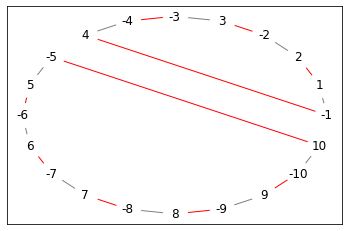

In [19]:
def genome_to_graph(genome):
    G = nx.Graph()
    return G

G = genome_to_graph([pd.Series([1,-2,-3,4]),pd.Series([5,6,7,8,9,10])])
show(G)

**Exercise 5**: Creating a breakpoint graph

For this exercise, I want you to construct a breakpoint graph. Again, I use a slightly different notation than the one in the book, but the results are the same.

Input: two genomes where a genome is a list of signed permutation (pandas Series objects)

Output: A networkx graph

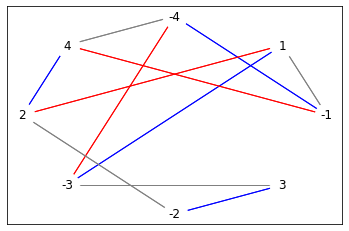

In [21]:
def combine(G,G2):
    Gcombined = nx.Graph()
    return Gcombined

P4_list = [1,-2,-3,4]
P4 = pd.Series(P4_list)
P5_list = [1,3,2,-4]
P5 = pd.Series(P5_list)

G_P4_P5 = combine(genome_to_graph([P4]),genome_to_graph([P5]))
show_combined(G_P4_P5)

**Exercise 6**: Finding the number of cycles in a combined graph

For this exercise, I want you to determine the number of alternating cycles in the combined graph if you remove the grey links (e.g., (-1,1)).

Input: A combined breakpoint graph

Output: Number of cycles as defined in the textbook as CYCLES(P,Q).

In [30]:
def cycles(G,G2):
    nalt_cycles = 0
    return nalt_cycles

ncycles = cycles(genome_to_graph([P4]),genome_to_graph([P5]))
ncycles

2

**Exercise 7**: Find the number of blocks in a graph

For this exercise, blocks is defined as referenced in the textbook.

Input: G - A genome graph

Output: Number of blocks in a genome graph.

In [24]:
def blocks(G):
    return 0

nblocks = blocks(genome_to_graph([P5]))
nblocks

4

**Exercise 7**: 2-Break Distance Problem

For this exercise, find the 2-break distance between two genomes.

Input: G - Two genomes

Output: 2-break distance

In [25]:
def two_break_distance(G,G2):
    # YOUR SOLUTION HERE
    return 0

P6_list = [1,2,3,4,5,6]
P6 = pd.Series(P6_list)
P7_list = [1,-3,-6,-5]
P7 = pd.Series(P7_list)
P8_list = [2,-4]
P8 = pd.Series(P8_list)

distance = two_break_distance(genome_to_graph([P6]),genome_to_graph([P7,P8]))
distance

3

In [31]:
import matplotlib.pyplot as plt

def print_from_graph(G):
    sub_graphs = [G.subgraph(c).copy() for c in nx.connected_components(G)] #nx.connected_component_subgraphs(Gcombined)
    all_to_print = []
    for sub_graph in sub_graphs:   
        if len(list(sub_graph.nodes())) == 2:
            cycle = list(sub_graph.edges())
        else:
            cycle = list(nx.find_cycle(sub_graph))
        to_print = []
        for i in range(0,len(cycle),2):
            to_print.append(cycle[i][1])
        all_to_print.append(to_print)
    print("".join([str(c) for c in all_to_print]))
    return set([tuple(c) for c in all_to_print])
    
def get_color(sub_graph,edge):
    data = sub_graph.get_edge_data(edge[0],edge[1])
    return data['color']

**Exercise 8**: Check to see if a cycle alternates between red and blue

For this exercise, blocks is defined as referenced in the textbook.

Input: G - A genome graph

Output: None,None if this is not a red/blue alternating cycle otherwise return the cycle and the colors

In [32]:
def red_blue_cycle_check(sub_graph,cycle):
    checked_cycle = None
    colors = []
    return checked_cycle,colors

G_P4_P5 = combine(genome_to_graph([P4]),genome_to_graph([P5]))
# Below is an example for how you can find all the cycles
test_cycles = list(nx.simple_cycles(G_P4_P5.to_directed()))
edge_cycles = [] # just a cycle listed as edges
for cycle in test_cycles:
    edge_cycle = []
    a = cycle[0]
    for b in cycle[1:]:
        edge_cycle.append([a,b])
        a = b
    edge_cycle.append([b,cycle[0]])
    edge_cycles.append(edge_cycle)
# Running the code on all cycles
for edge_cycle in edge_cycles:
    #print(edge_cycle)
    checked_cycle, colors = red_blue_cycle_check(G_P4_P5,edge_cycle)
    #print(colors)
    
test_edge_cycle = [[1, -3], [-3, -4], [-4, -1], [-1, 4], [4, 2], [2, 1]]
checked_cycle, colors = red_blue_cycle_check(G_P4_P5,test_edge_cycle)
print(checked_cycle)
print(colors)

[[1, -3], [-3, -4], [-4, -1], [-1, 4], [4, 2], [2, 1]]
['blue', 'red', 'blue', 'red', 'blue', 'red']


### More predefined functions for you to use

In [34]:
def two_break_on_genome_graph(G,i1,i2,i3,i4,color='red'):
    G.remove_edge(i1,i2)
    G.remove_edge(i3,i4)
    G.add_edge(i1,i4,color=color)
    G.add_edge(i2,i3,color=color)
    
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

**Exercise 9**: 2-Break Sorting Problem

Find a shortest transformation of one genome into another by 2-breaks.

Input: Two genomes with circular chromosomes on the same set of synteny blocks (i.e., the usual)

Output: The sequence of genomes resulting from applying a shortest sequence of 2-breaks transforming one genome into the other.

[1, -2, -3, 4]
[1, 2, -3, 4]
[1, 2, 3, 4]
[1, 2, -4, -3]


[{(1, -2, -3, 4)}, {(1, 2, -3, 4)}, {(1, 2, 3, 4)}, {(1, 2, -4, -3)}]

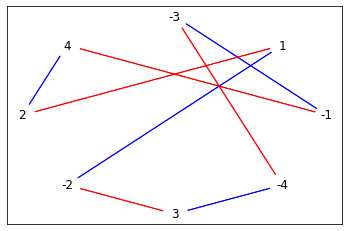

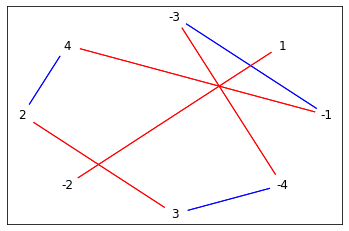

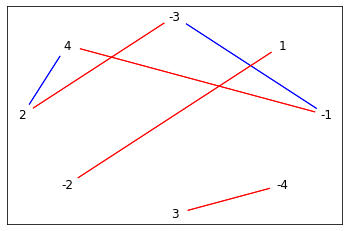

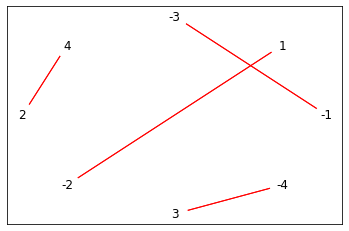

In [35]:
def shortest_rearrangement_scenario(P,Q):
    G_P = genome_to_graph(P)
    G_Q = genome_to_graph(Q)
    Gcombined = combine(G_P,G_Q)
    plt.figure(0)
    steps = [print_from_graph(G_P)]
    show_combined(Gcombined,show_grey=False)
    return steps
        
steps = shortest_rearrangement_scenario([pd.Series([1,-2,-3,4])],[pd.Series([1,2,-4,-3])])
steps

In [17]:
# Don't forget to push!